In [198]:
import numpy as np
import numpy.random as random
from sympy import symbols, simplify
import matplotlib.pyplot as plt

In [60]:
pars = np.array([
    [1, 9, 97, 1471, 4373, 16562327058095984867, 36640147837641911916],
    [-2, -14, -110, -1296, -3094, -9863949575375451051, -18577236996232658881],
    [16, 48, 232, 2004, 3672, 9655811055183462400, 15220063614447648768],
    [14, 34, 122, 708, 578, -2.08138520191989e17, - 3.35717338178501e+18]
], dtype=float)

In [61]:
for i in range(len(pars[0])):
    for j in range(1, 4):
        pars[j][i] /= pars[0][i]
    pars[0][i] = 1

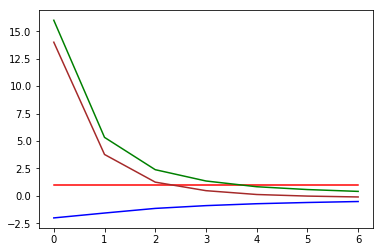

In [62]:
plt.plot(pars[0], 'r');
plt.plot(pars[1], 'b');
plt.plot(pars[2], 'g');
plt.plot(pars[3], 'brown');

In [82]:
pars

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-2.00000000e+00, -1.55555556e+00, -1.13402062e+00,
        -8.81033311e-01, -7.07523439e-01, -5.95565438e-01,
        -5.07018615e-01],
       [ 1.60000000e+01,  5.33333333e+00,  2.39175258e+00,
         1.36233855e+00,  8.39698148e-01,  5.82998453e-01,
         4.15393073e-01],
       [ 1.40000000e+01,  3.77777778e+00,  1.25773196e+00,
         4.81305235e-01,  1.32174708e-01, -1.25669853e-02,
        -9.16255414e-02]])

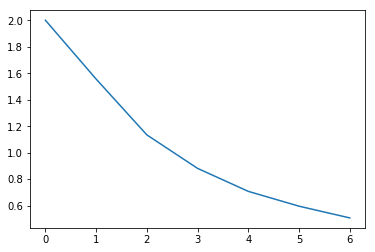

In [56]:
plt.plot(pars[2]-pars[3]);

In [194]:
ROW_NUMBER = 1

def fit(x, parameters):
    return (parameters[0] + parameters[1] * x)/(parameters[2]*x - parameters[3])
    
def score(parameters):
    sse = 0
    for t in range(1, 8):
        s = fit(t, parameters)
        sse += (pars[ROW_NUMBER][t-1]-s)**2
    return sse

def mc_run(score, mc_steps = 50, initial=[1, 1, 1, 1]):  
    if initial:
        parameters = initial
    else:
        parameters = [1, 1, 0.7, 1]

    e1 = score(parameters)
    bestParameters = parameters
    bestScore = e1
    
    # Monte Carlo steps
    for i in range(mc_steps): 
        # mutate random property
        what = random.choice([0, 1, 2, 3])
        parameters2 = parameters.copy()
        parameters2[what] += random.uniform(-0.2, 0.2)
            
        e2 = score(parameters2)
        delta = e2-e1
        
        if delta < 0 or np.exp(-delta) > np.random.uniform(): # Metropolis criterion
            parameters = parameters2
            e1 = e2
            if e1 < bestScore:
                bestParameters = parameters
                bestScore = e1

    return bestParameters

In [100]:
mc_run(score, mc_steps=100000)

[-1.3691344801415097, 1.226966921652647, 1.1420284064653021, 1.152347797422074]

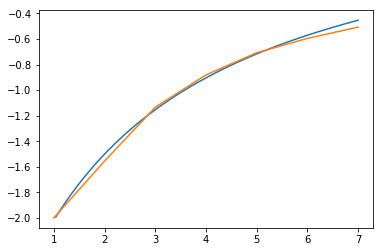

In [129]:
x = np.linspace(1.04, 7, num=1000)
result = mc_run(score, mc_steps=10000)
y = fit(x, parameters=result)
plt.plot(x, y);
plt.plot([1, 2, 3, 4, 5, 6, 7], pars[ROW_NUMBER]);

In [131]:
result

[-3.6303656041773165,
 0.25069924295984714,
 0.41048204662765264,
 -1.2639619805506834]

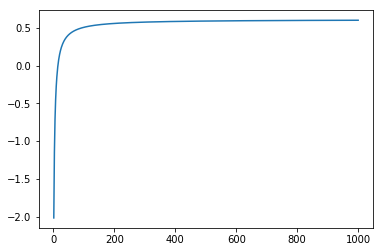

In [132]:
x = np.linspace(1, 1000, num=1000)
y = fit(x, parameters=result)
plt.plot(x, y);

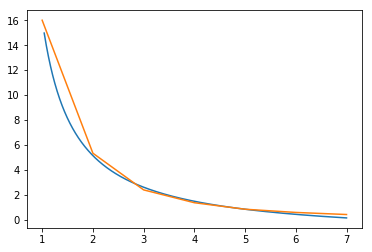

In [195]:
ROW_NUMBER = 2

x = np.linspace(1.04, 7, num=1000)
result = mc_run(score, mc_steps=10000, initial=[1.3, 1.1, -1, 1])
y = fit(x, parameters=result)
plt.plot(x, y);
plt.plot([1, 2, 3, 4, 5, 6, 7], pars[ROW_NUMBER]);

In [197]:
result

[-3.5996288345600265,
 0.4706693763267059,
 -0.3222649610233761,
 -0.12741404301438508]

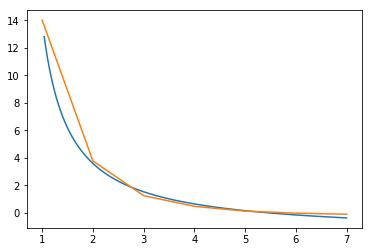

In [200]:
ROW_NUMBER = 3

x = np.linspace(1.04, 7, num=1000)
result = mc_run(score, mc_steps=10000, initial=[1.3, 1.1, -1, 1])
y = fit(x, parameters=result)
plt.plot(x, y);
plt.plot([1, 2, 3, 4, 5, 6, 7], pars[ROW_NUMBER]);

In [202]:
result

[-3.189304496569232,
 0.5810504338266903,
 -0.37638693749287405,
 -0.18948227269774373]

In [207]:
d, tau = symbols('d t')

In [208]:
mu = (1 + (-3.6+ 0.25*tau)/(0.4*tau -1.3 )*d)/((-3.6+ 0.5*tau)/(-0.32*tau -0.1 )*d + (-3.2+ 0.6*tau)/(-0.4*tau -0.2 ))
simplify(mu)

-(0.32*t + 0.1)*(0.4*t + 0.2)*(d*(0.25*t - 3.6) + 0.4*t - 1.3)/((0.4*t - 1.3)*(d*(0.4*t + 0.2)*(0.5*t - 3.6) + (0.32*t + 0.1)*(0.6*t - 3.2)))